In [2]:
import os
import numpy as np

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Task 1

[[[120. 123.  68.]
  [115. 125.  64.]
  [113. 130.  60.]
  ...
  [ 91. 108.  37.]
  [105. 118.  48.]
  [103. 113.  44.]]

 [[149. 149.  99.]
  [139. 147.  90.]
  [119. 131.  67.]
  ...
  [ 86. 106.  35.]
  [ 93. 108.  39.]
  [112. 123.  55.]]

 [[138. 133.  91.]
  [142. 141.  93.]
  [132. 137.  83.]
  ...
  [ 93. 113.  44.]
  [ 97. 112.  43.]
  [ 94. 105.  39.]]

 ...

 [[ 69.  90.  34.]
  [ 74.  95.  38.]
  [119. 139.  78.]
  ...
  [ 41.  56.  17.]
  [ 45.  57.  21.]
  [ 60.  72.  34.]]

 [[103. 122.  66.]
  [127. 146.  91.]
  [117. 134.  82.]
  ...
  [ 25.  39.   4.]
  [ 60.  73.  30.]
  [ 87.  97.  47.]]

 [[137. 153.  88.]
  [121. 135.  82.]
  [ 74.  86.  40.]
  ...
  [ 91. 104.  74.]
  [134. 146.  98.]
  [ 92. 103.  37.]]]
-----------
[[[164. 189. 149.]
  [154. 180. 143.]
  [158. 183. 153.]
  ...
  [102. 129.  98.]
  [118. 152. 115.]
  [136. 174. 135.]]

 [[138. 164. 127.]
  [142. 168. 131.]
  [120. 146. 109.]
  ...
  [108. 135. 104.]
  [ 84. 119.  77.]
  [108. 147. 100.]]

 [[104

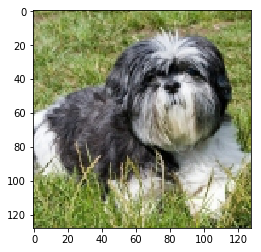

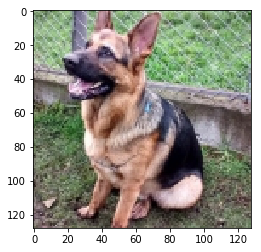

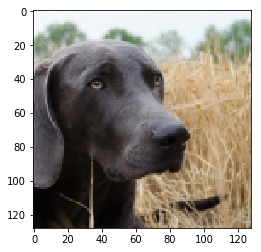

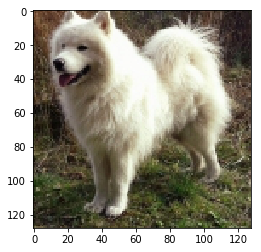

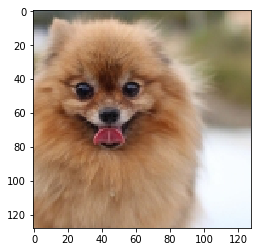

In [3]:
img_source='images'
for image in os.listdir(img_source):
    img = load_img(img_source+'\\'+image) #load image
    plt.figure() #show image
    plt.imshow(img)
    img_array = img_to_array(img) #get pixel values
    print(img_array)
    print('-----------')


# Task 2

In [4]:
img_source='images'
for image in os.listdir(img_source):
    img = load_img(img_source+'\\'+image)
    img_array = img_to_array(img)
    print('Mean of every channel:')
    mean_arr=np.mean(img_array, axis=tuple(range(img_array.ndim-1))) #get mean values on every channel
    print(mean_arr)
    print('Standard deviation of every channel:')
    std_arr=np.std(img_array, axis=tuple(range(img_array.ndim-1))) #get std values on every channel
    print(std_arr)
    print('After normalization:')
    img_arr_norm=(mean_arr-np.mean(mean_arr))/np.std(mean_arr) #normalization is necessary in order to obtain std=1 and EX(mean)=0 
    print(img_arr_norm)
    print('Standard deviation:')
    print(np.std(img_arr_norm))
    print('Expected value (mean):')
    print(np.mean(img_arr_norm))
    print('\n')

Mean of every channel:
[126.59595  132.11707  100.486755]
Standard deviation of every channel:
[52.651295 53.208202 56.33037 ]
After normalization:
[ 0.4974869  0.897721  -1.3952073]
Standard deviation:
0.9999999
Expected value (mean):
1.9868214e-07


Mean of every channel:
[129.57355  126.62671  111.920166]
Standard deviation of every channel:
[53.33158  52.253967 47.91    ]
After normalization:
[ 0.88928926  0.50765365 -1.3969439 ]
Standard deviation:
1.0
Expected value (mean):
-3.5762787e-07


Mean of every channel:
[127.78088 119.24133 107.52991]
Standard deviation of every channel:
[74.819725 73.0484   70.1866  ]
After normalization:
[ 1.1560841   0.12736642 -1.2834514 ]
Standard deviation:
1.0
Expected value (mean):
-3.1789145e-07


Mean of every channel:
[125.18512 119.38684 100.25476]
Standard deviation of every channel:
[69.985634 72.0021   72.911896]
After normalization:
[ 0.9615955   0.41725662 -1.3788514 ]
Standard deviation:
1.0
Expected value (mean):
2.3841858e-07


Mean 

# Task 3

The future of deep learning
The Keras Blog
Keras is a Deep Learning library for Python, that is simple, modular, and extensible.
Archives
Github
Documentation
Google Group
The future of deep learning
Tue 18 July 2017
By Francois Chollet
In Essays.
This post is adapted from Section 3 of Chapter 9 of my book, Deep Learning with Python (Manning Publications).
It is part of a series of two posts on the current limitations of deep learning, and its future.
You can read the first part here: The Limitations of Deep Learning.
Given what we know of how deep nets work, of their limitations, and of the current state of the research landscape,
can we predict where things are headed in the medium term? Here are some purely personal thoughts. Note that I don't have a crystal ball,
so a lot of what I anticipate might fail to become reality. This is a completely speculative post.
I am sharing these predictions not because I expect them to be proven
completely right in the future, but because they are 

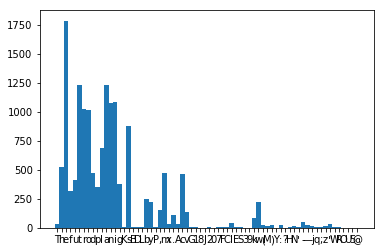

In [5]:
#text scraping source: https://stackoverflow.com/questions/328356/extracting-text-from-html-file-using-python

import urllib.request as ur
from bs4 import BeautifulSoup
from collections import Counter

url = 'https://blog.keras.io/the-future-of-deep-learning.html'
html = ur.urlopen(url).read()
soup = BeautifulSoup(html)

for script in soup(["script", "style"]):
    script.extract() #skip style elements

text = soup.get_text()

lines = (line.strip() for line in text.splitlines()) #get lines
chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) 
text = '\n'.join(chunk for chunk in chunks if chunk) #leave empty lines behind
print(text)


c = Counter()
for letter in text:
    c += Counter(letter.strip())

labels, values = zip(*c.items()) #create a dictionary like data structure
indexes = np.arange(len(labels))
plt.bar(indexes, values, 1) #show histogram as barplot 
plt.xticks(indexes, labels)
plt.show()

# Task 4

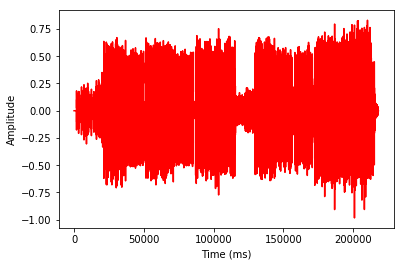

In [30]:
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft


myAudio = 'audio/test1.wav'

samplingFreq, mySound = wavfile.read(myAudio) #read audio file

mySoundDataType = mySound.dtype #check if wave file is 16bit or 32 bit

mySound = mySound / (2.**15) #we can convert our sound array to floating point values ranging from -1 to 1 as follows

mySoundShape = mySound.shape #check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel
samplePoints = float(mySound.shape[0])

signalDuration =  mySound.shape[0] / samplingFreq #get duration of sound file

mySoundOneChannel = mySound[:]

timeArray = numpy.arange(0, samplePoints, 1) # plotting the pressure values against time axis

timeArray = timeArray / samplingFreq

timeArray = timeArray * 1000 #scale to milliSeconds

plt.plot(timeArray, mySoundOneChannel, color='R')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()